In [ ]:
from training_and_eval import *

In [ ]:
pwd()

'/content'

In [ ]:
VAE_BATCH_SIZE = 100
VAE_EPOCHS = 50
VAE_LR = 3e-4

CNN_BATCH_SIZE = 20
CNN_EPOCHS = 5
CNN_LR = 1e-3

NETS = 10

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


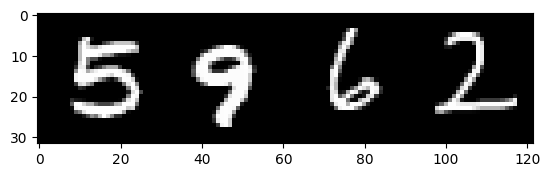

tensor([5, 9, 6, 2])


In [ ]:
trainset, testset = get_datasets()
trainloader = get_trainloader(trainset, VAE_BATCH_SIZE)
testloader = get_testloader(testset, 1)
show_batch(trainset, 4)

In [ ]:
vae_model, vae_losses = train_vae(trainloader, device, num_epochs=VAE_EPOCHS, batch_size=VAE_BATCH_SIZE, learning_rate=VAE_LR)

TRAINING VAE
Epoch: 1/50, Epoch Train Loss: 182.7968
Epoch Time: 10.290123701095581 seconds

Epoch: 2/50, Epoch Train Loss: 136.1415
Epoch Time: 9.276592254638672 seconds

Epoch: 3/50, Epoch Train Loss: 126.9329
Epoch Time: 9.243604898452759 seconds

Epoch: 4/50, Epoch Train Loss: 119.7914
Epoch Time: 9.174817085266113 seconds

Epoch: 5/50, Epoch Train Loss: 113.3809
Epoch Time: 9.262112140655518 seconds

Epoch: 6/50, Epoch Train Loss: 109.8890
Epoch Time: 9.28860068321228 seconds

Epoch: 7/50, Epoch Train Loss: 107.9017
Epoch Time: 9.17555284500122 seconds

Epoch: 8/50, Epoch Train Loss: 106.3017
Epoch Time: 9.2444326877594 seconds

Epoch: 9/50, Epoch Train Loss: 104.9093
Epoch Time: 9.189446926116943 seconds

Epoch: 10/50, Epoch Train Loss: 103.5345
Epoch Time: 9.186591863632202 seconds

Epoch: 11/50, Epoch Train Loss: 102.2208
Epoch Time: 9.255743741989136 seconds

Epoch: 12/50, Epoch Train Loss: 100.9258
Epoch Time: 9.131549596786499 seconds

Epoch: 13/50, Epoch Train Loss: 99.6291

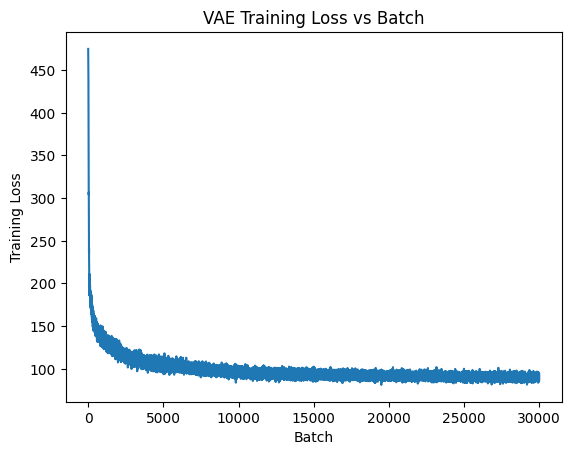

In [ ]:
plt.title("VAE Training Loss vs Batch")
plt.ylabel("Training Loss")
plt.xlabel("Batch")
plt.plot(range(len(vae_losses)), vae_losses)

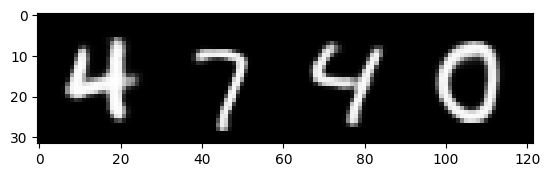

tensor([4, 7, 4, 0])


In [ ]:
save_synth_data(vae_model, device)
genset = GeneratedMNISTDataset()
genloader = DataLoader(genset, batch_size=4, shuffle=True)
show_batch(genset, 4)

In [ ]:
data, labels = prep_real_data(trainset)
trainset = OriginalMNISTDataset(data, labels)

In [ ]:
pure_model, pure_losses, pure_acc = train_cnn(trainset, testloader, genset, 1.0, device, generated_ratio=0.0, batch_size=CNN_BATCH_SIZE, num_epochs=CNN_EPOCHS, learning_rate=CNN_LR)
pure_acc

0.9823

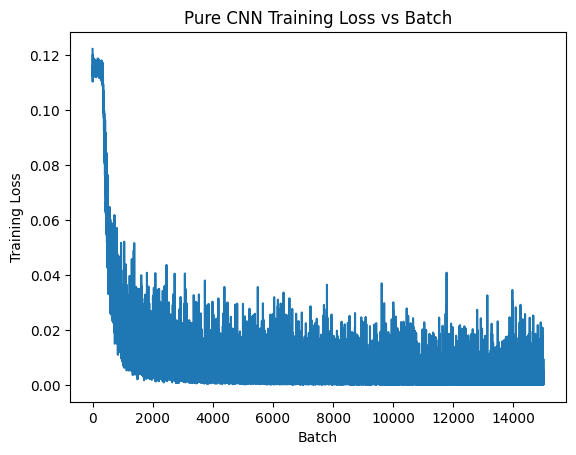

In [ ]:
plt.title("Pure CNN Training Loss vs Batch")
plt.ylabel("Training Loss")
plt.xlabel("Batch")
plt.plot(range(len(pure_losses)), pure_losses)

In [ ]:
synth_model, synth_losses, synth_acc = train_cnn(trainset, testloader, genset, 0.0, device, generated_ratio=1.0, batch_size=CNN_BATCH_SIZE, num_epochs=CNN_EPOCHS, learning_rate=CNN_LR)
synth_acc

0.964

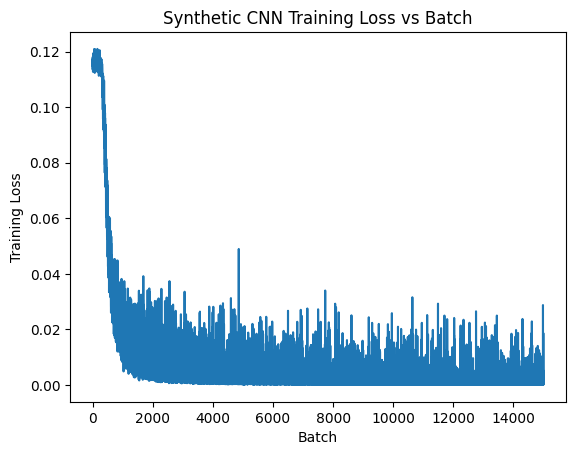

In [ ]:
plt.title("Synthetic CNN Training Loss vs Batch")
plt.ylabel("Training Loss")
plt.xlabel("Batch")
plt.plot(range(len(synth_losses)), synth_losses)

In [ ]:
#Now do large experiments

In [ ]:
mnist_ratios = np.linspace(0.05, 1.0, 20)
mnist_ratios

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [ ]:
pure_means, pure_devs = train_pure_cnns(trainset, testloader, genset, mnist_ratios, device, nets=NETS, batch_size=CNN_BATCH_SIZE, num_epochs=CNN_EPOCHS, learning_rate=CNN_LR)
print(pure_means)
print(pure_devs)

Ratio: 0.05
Net: 1 / 10
Net: 2 / 10
Net: 3 / 10
Net: 4 / 10
Net: 5 / 10
Net: 6 / 10
Net: 7 / 10
Net: 8 / 10
Net: 9 / 10
Net: 10 / 10
Ratio Time: 103.41081738471985 seconds

Ratio: 0.1
Net: 1 / 10
Net: 2 / 10
Net: 3 / 10
Net: 4 / 10
Net: 5 / 10
Net: 6 / 10
Net: 7 / 10
Net: 8 / 10
Net: 9 / 10
Net: 10 / 10
Ratio Time: 121.74641346931458 seconds

Ratio: 0.15
Net: 1 / 10
Net: 2 / 10
Net: 3 / 10
Net: 4 / 10
Net: 5 / 10
Net: 6 / 10
Net: 7 / 10
Net: 8 / 10
Net: 9 / 10
Net: 10 / 10
Ratio Time: 140.14218091964722 seconds

Ratio: 0.2
Net: 1 / 10
Net: 2 / 10
Net: 3 / 10
Net: 4 / 10
Net: 5 / 10
Net: 6 / 10
Net: 7 / 10
Net: 8 / 10
Net: 9 / 10
Net: 10 / 10
Ratio Time: 158.38748717308044 seconds

Ratio: 0.25
Net: 1 / 10
Net: 2 / 10
Net: 3 / 10
Net: 4 / 10
Net: 5 / 10
Net: 6 / 10
Net: 7 / 10
Net: 8 / 10
Net: 9 / 10
Net: 10 / 10
Ratio Time: 176.34654545783997 seconds

Ratio: 0.3
Net: 1 / 10
Net: 2 / 10
Net: 3 / 10
Net: 4 / 10
Net: 5 / 10
Net: 6 / 10
Net: 7 / 10
Net: 8 / 10
Net: 9 / 10
Net: 10 / 10
Ratio

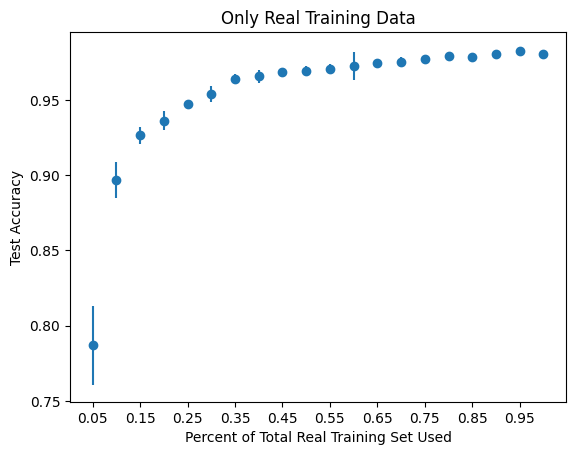

In [ ]:
plt.scatter(mnist_ratios, pure_means)
plt.xticks(mnist_ratios[::2])
plt.errorbar(mnist_ratios, pure_means, yerr=pure_devs, fmt='none')
plt.ylabel("Test Accuracy")
plt.xlabel("Percent of Total Real Training Set Used")
plt.title("Only Real Training Data")
plt.show()

In [ ]:
gen_ratios = np.linspace(0.05, 1.0, 20)
gen_ratios

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [ ]:
synth_means, synth_devs = train_synth_cnns(trainset, testloader, genset, gen_ratios, device, nets=NETS, batch_size=CNN_BATCH_SIZE, num_epochs=CNN_EPOCHS, learning_rate=CNN_LR)
print(synth_means)
print(synth_devs)

Ratio: 0.05
Net: 1 / 10
Net: 2 / 10
Net: 3 / 10
Net: 4 / 10
Net: 5 / 10
Net: 6 / 10
Net: 7 / 10
Net: 8 / 10
Net: 9 / 10
Net: 10 / 10
Ratio Time: 104.07405018806458 seconds

Ratio: 0.1
Net: 1 / 10
Net: 2 / 10
Net: 3 / 10
Net: 4 / 10
Net: 5 / 10
Net: 6 / 10
Net: 7 / 10
Net: 8 / 10
Net: 9 / 10
Net: 10 / 10
Ratio Time: 122.06471467018127 seconds

Ratio: 0.15
Net: 1 / 10
Net: 2 / 10
Net: 3 / 10
Net: 4 / 10
Net: 5 / 10
Net: 6 / 10
Net: 7 / 10
Net: 8 / 10
Net: 9 / 10
Net: 10 / 10
Ratio Time: 140.06099200248718 seconds

Ratio: 0.2
Net: 1 / 10
Net: 2 / 10
Net: 3 / 10
Net: 4 / 10
Net: 5 / 10
Net: 6 / 10
Net: 7 / 10
Net: 8 / 10
Net: 9 / 10
Net: 10 / 10
Ratio Time: 158.66935682296753 seconds

Ratio: 0.25
Net: 1 / 10
Net: 2 / 10
Net: 3 / 10
Net: 4 / 10
Net: 5 / 10
Net: 6 / 10
Net: 7 / 10
Net: 8 / 10
Net: 9 / 10
Net: 10 / 10
Ratio Time: 176.91228485107422 seconds

Ratio: 0.3
Net: 1 / 10
Net: 2 / 10
Net: 3 / 10
Net: 4 / 10
Net: 5 / 10
Net: 6 / 10
Net: 7 / 10
Net: 8 / 10
Net: 9 / 10
Net: 10 / 10
Ratio

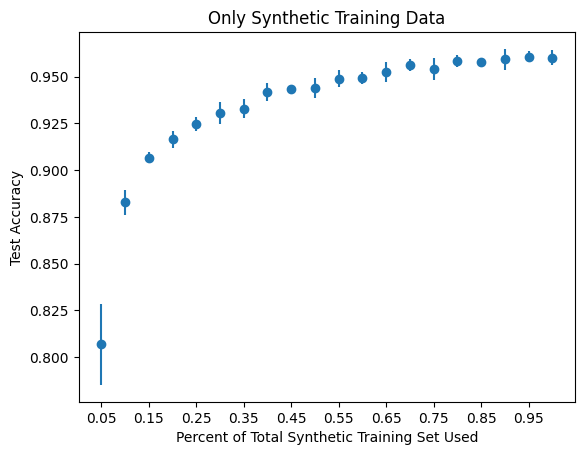

In [ ]:
plt.scatter(gen_ratios, synth_means)
plt.xticks(gen_ratios[::2])
plt.errorbar(gen_ratios, synth_means, yerr=synth_devs, fmt='none')
plt.ylabel("Test Accuracy")
plt.xlabel("Percent of Total Synthetic Training Set Used")
plt.title("Only Synthetic Training Data")
plt.show()

In [ ]:
mnist_ratios = np.linspace(0.05, 0.95, 19)
mnist_ratios

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [ ]:
mixed_means, mixed_devs = train_mixed_cnns(trainset, testloader, genset, mnist_ratios, device, nets=NETS, batch_size=CNN_BATCH_SIZE, num_epochs=CNN_EPOCHS, learning_rate=CNN_LR)
print(mixed_means)
print(mixed_devs)

Ratio: 0.05
Net: 1 / 10
Net: 2 / 10
Net: 3 / 10
Net: 4 / 10
Net: 5 / 10
Net: 6 / 10
Net: 7 / 10
Net: 8 / 10
Net: 9 / 10
Net: 10 / 10
Ratio Time: 452.2991006374359 seconds

Ratio: 0.1
Net: 1 / 10
Net: 2 / 10
Net: 3 / 10
Net: 4 / 10
Net: 5 / 10
Net: 6 / 10
Net: 7 / 10
Net: 8 / 10
Net: 9 / 10
Net: 10 / 10
Ratio Time: 451.52468514442444 seconds

Ratio: 0.15
Net: 1 / 10
Net: 2 / 10
Net: 3 / 10
Net: 4 / 10
Net: 5 / 10
Net: 6 / 10
Net: 7 / 10
Net: 8 / 10
Net: 9 / 10
Net: 10 / 10
Ratio Time: 452.7777602672577 seconds

Ratio: 0.2
Net: 1 / 10
Net: 2 / 10
Net: 3 / 10
Net: 4 / 10
Net: 5 / 10
Net: 6 / 10
Net: 7 / 10
Net: 8 / 10
Net: 9 / 10
Net: 10 / 10
Ratio Time: 452.25784730911255 seconds

Ratio: 0.25
Net: 1 / 10
Net: 2 / 10
Net: 3 / 10
Net: 4 / 10
Net: 5 / 10
Net: 6 / 10
Net: 7 / 10
Net: 8 / 10
Net: 9 / 10
Net: 10 / 10
Ratio Time: 453.91813111305237 seconds

Ratio: 0.3
Net: 1 / 10
Net: 2 / 10
Net: 3 / 10
Net: 4 / 10
Net: 5 / 10
Net: 6 / 10
Net: 7 / 10
Net: 8 / 10
Net: 9 / 10
Net: 10 / 10
Ratio T

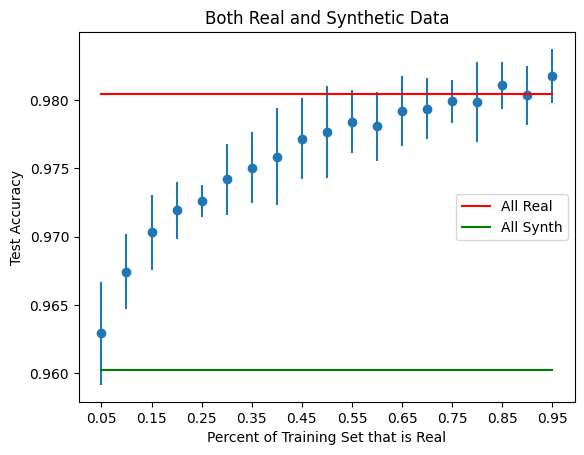

In [ ]:
xs = np.linspace(mnist_ratios[0], mnist_ratios[-1], 1000)
plt.scatter(mnist_ratios, mixed_means)
plt.xticks(mnist_ratios[::2])
plt.errorbar(mnist_ratios, mixed_means, yerr=mixed_devs, fmt='none')
plt.plot(xs, [pure_means[-1]]*len(xs), color='red', label="All Real")
plt.plot(xs, [synth_means[-1]]*len(xs), color='green', label="All Synth")
plt.legend(loc='right')
plt.ylabel("Test Accuracy")
plt.xlabel("Percent of Training Set that is Real")
plt.title("Both Real and Synthetic Data")
plt.show()

In [ ]:
gen_ratios = np.linspace(0.05, 1.0, 20)
gen_ratios

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [ ]:
extended_means, extended_devs = train_extended_cnns(trainset, testloader, genset, gen_ratios, device, nets=NETS, batch_size=CNN_BATCH_SIZE, num_epochs=CNN_EPOCHS, learning_rate=CNN_LR)
print(extended_means)
print(extended_devs)

Ratio: 0.05
Net: 1 / 10
Net: 2 / 10
Net: 3 / 10
Net: 4 / 10
Net: 5 / 10
Net: 6 / 10
Net: 7 / 10
Net: 8 / 10
Net: 9 / 10
Net: 10 / 10
Ratio Time: 470.7267198562622 seconds

Ratio: 0.1
Net: 1 / 10
Net: 2 / 10
Net: 3 / 10
Net: 4 / 10
Net: 5 / 10
Net: 6 / 10
Net: 7 / 10
Net: 8 / 10
Net: 9 / 10
Net: 10 / 10
Ratio Time: 489.5808594226837 seconds

Ratio: 0.15
Net: 1 / 10
Net: 2 / 10
Net: 3 / 10
Net: 4 / 10
Net: 5 / 10
Net: 6 / 10
Net: 7 / 10
Net: 8 / 10
Net: 9 / 10
Net: 10 / 10
Ratio Time: 507.9184374809265 seconds

Ratio: 0.2
Net: 1 / 10
Net: 2 / 10
Net: 3 / 10
Net: 4 / 10
Net: 5 / 10
Net: 6 / 10
Net: 7 / 10
Net: 8 / 10
Net: 9 / 10
Net: 10 / 10
Ratio Time: 527.1232233047485 seconds

Ratio: 0.25
Net: 1 / 10
Net: 2 / 10
Net: 3 / 10
Net: 4 / 10
Net: 5 / 10
Net: 6 / 10
Net: 7 / 10
Net: 8 / 10
Net: 9 / 10
Net: 10 / 10
Ratio Time: 542.1376829147339 seconds

Ratio: 0.3
Net: 1 / 10
Net: 2 / 10
Net: 3 / 10
Net: 4 / 10
Net: 5 / 10
Net: 6 / 10
Net: 7 / 10
Net: 8 / 10
Net: 9 / 10
Net: 10 / 10
Ratio Time

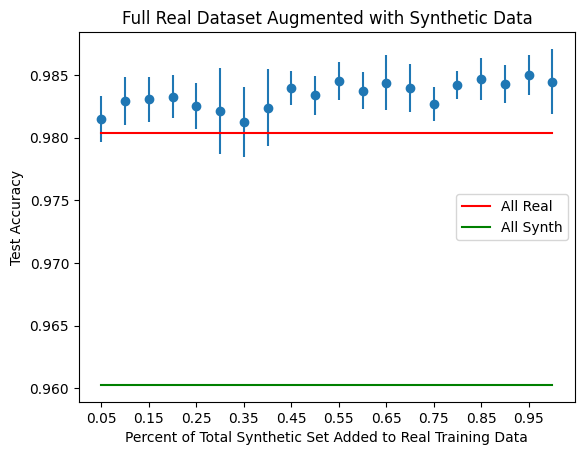

In [ ]:
xs = np.linspace(gen_ratios[0], gen_ratios[-1], 1000)
plt.scatter(gen_ratios, extended_means)
plt.xticks(gen_ratios[::2])
plt.errorbar(gen_ratios, extended_means, yerr=extended_devs, fmt='none')
plt.plot(xs, [pure_means[-1]]*len(xs), color='red', label="All Real")
plt.plot(xs, [synth_means[-1]]*len(xs), color='green', label="All Synth")
plt.legend(loc='right')
plt.ylabel("Test Accuracy")
plt.xlabel("Percent of Total Synthetic Set Added to Real Training Data")
plt.title("Full Real Dataset Augmented with Synthetic Data")
plt.show()

In [ ]:
extended_means_pure, extended_devs_pure = train_extended_cnns(trainset, testloader, trainset, gen_ratios, device, nets=NETS, batch_size=CNN_BATCH_SIZE, num_epochs=CNN_EPOCHS, learning_rate=CNN_LR)
print(extended_means_pure)
print(extended_devs_pure)

Ratio: 0.05
Net: 1 / 10
Net: 2 / 10
Net: 3 / 10
Net: 4 / 10
Net: 5 / 10
Net: 6 / 10
Net: 7 / 10
Net: 8 / 10
Net: 9 / 10
Net: 10 / 10
Ratio Time: 465.4843876361847 seconds

Ratio: 0.1
Net: 1 / 10
Net: 2 / 10
Net: 3 / 10
Net: 4 / 10
Net: 5 / 10
Net: 6 / 10
Net: 7 / 10
Net: 8 / 10
Net: 9 / 10
Net: 10 / 10
Ratio Time: 485.9918396472931 seconds

Ratio: 0.15
Net: 1 / 10
Net: 2 / 10
Net: 3 / 10
Net: 4 / 10
Net: 5 / 10
Net: 6 / 10
Net: 7 / 10
Net: 8 / 10
Net: 9 / 10
Net: 10 / 10
Ratio Time: 503.2014856338501 seconds

Ratio: 0.2
Net: 1 / 10
Net: 2 / 10
Net: 3 / 10
Net: 4 / 10
Net: 5 / 10
Net: 6 / 10
Net: 7 / 10
Net: 8 / 10
Net: 9 / 10
Net: 10 / 10
Ratio Time: 519.0307250022888 seconds

Ratio: 0.25
Net: 1 / 10
Net: 2 / 10
Net: 3 / 10
Net: 4 / 10
Net: 5 / 10
Net: 6 / 10
Net: 7 / 10
Net: 8 / 10
Net: 9 / 10
Net: 10 / 10
Ratio Time: 538.9108102321625 seconds

Ratio: 0.3
Net: 1 / 10
Net: 2 / 10
Net: 3 / 10
Net: 4 / 10
Net: 5 / 10
Net: 6 / 10
Net: 7 / 10
Net: 8 / 10
Net: 9 / 10
Net: 10 / 10
Ratio Time

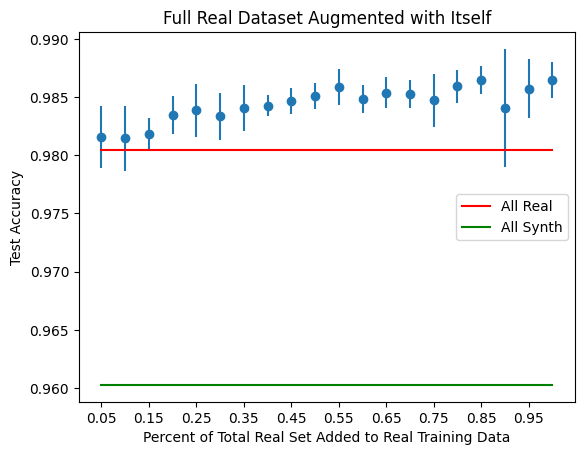

In [ ]:
xs = np.linspace(gen_ratios[0], gen_ratios[-1], 1000)
plt.scatter(gen_ratios, extended_means_pure)
plt.xticks(gen_ratios[::2])
plt.errorbar(gen_ratios, extended_means_pure, yerr=extended_devs_pure, fmt='none')
plt.plot(xs, [pure_means[-1]]*len(xs), color='red', label="All Real")
plt.plot(xs, [synth_means[-1]]*len(xs), color='green', label="All Synth")
plt.legend(loc='right')
plt.ylabel("Test Accuracy")
plt.xlabel("Percent of Total Real Set Added to Real Training Data")
plt.title("Full Real Dataset Augmented with Itself")
plt.show()

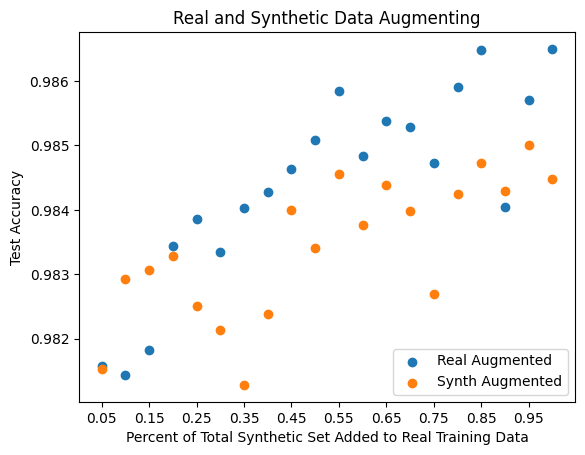

In [ ]:
plt.scatter(gen_ratios, extended_means_pure, label="Real Augmented")
plt.scatter(gen_ratios, extended_means, label="Synth Augmented")
plt.xticks(gen_ratios[::2])
plt.legend(loc='lower right')
plt.ylabel("Test Accuracy")
plt.xlabel("Percent of Total Synthetic Set Added to Real Training Data")
plt.title("Real and Synthetic Data Augmenting")
plt.show()